In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

data = df.filter(['Close'])

dataset = data.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Define the training dataset
train_data = scaled_data[:int(len(scaled_data)*0.8)]

# Split the training dataset into input and output data
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the input and output data to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the input data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [8]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
49/49 [==============================] - 13s 97ms/step - loss: 0.0149
Epoch 2/20
49/49 [==============================] - 5s 99ms/step - loss: 0.0032
Epoch 3/20
49/49 [==============================] - 4s 92ms/step - loss: 0.0026
Epoch 4/20
49/49 [==============================] - 5s 92ms/step - loss: 0.0025
Epoch 5/20
49/49 [==============================] - 4s 90ms/step - loss: 0.0023
Epoch 6/20
49/49 [==============================] - 4s 91ms/step - loss: 0.0022
Epoch 7/20
49/49 [==============================] - 4s 91ms/step - loss: 0.0028
Epoch 8/20
49/49 [==============================] - 5s 93ms/step - loss: 0.0022
Epoch 9/20
49/49 [==============================] - 5s 92ms/step - loss: 0.0022
Epoch 10/20
49/49 [==============================] - 4s 90ms/step - loss: 0.0022
Epoch 11/20
49/49 [==============================] - 4s 89ms/step - loss: 0.0021
Epoch 12/20
49/49 [==============================] - 5s 92ms/step - loss: 0.0021
Epoch 13/20
49/49 [=================

In [9]:
# Define the test dataset
test_data = scaled_data[int(len(scaled_data)*0.8)-60:]

# Split the test dataset into input and output data
x_test = []
y_test = dataset[int(len(dataset)*0.8):]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the input data to numpy array and reshape it for LSTM
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions on the test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 3s 44ms/step


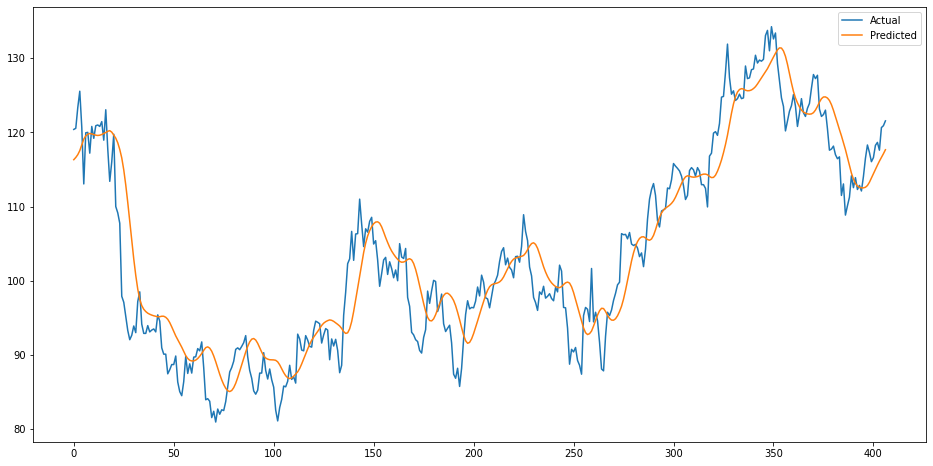

In [10]:
plt.figure(figsize=(16,8))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# another program

In [15]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

stock_data = yf.download('AAPL', start='2016-01-01', end='2021-10-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074738,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471445,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012114,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040897,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157440,283192000


Text(0, 0.5, 'Prices ($)')

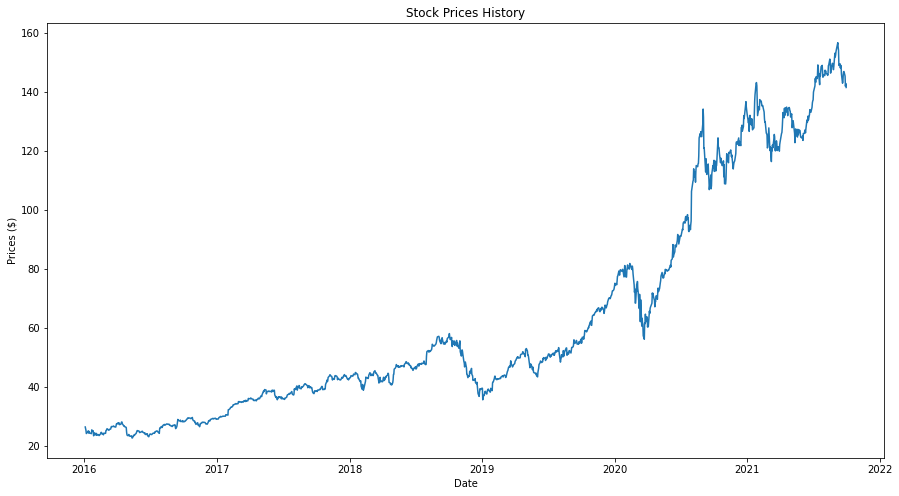

In [16]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [17]:
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [18]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=1
         )

1098/1098 [==============================] - 56s 45ms/step - loss: 5.2481e-04


In [22]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10/10 [==============================] - 3s 58ms/step


1.0750860722419713

C:\Users\hp\AppData\Local\Temp/ipykernel_13624/154904543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


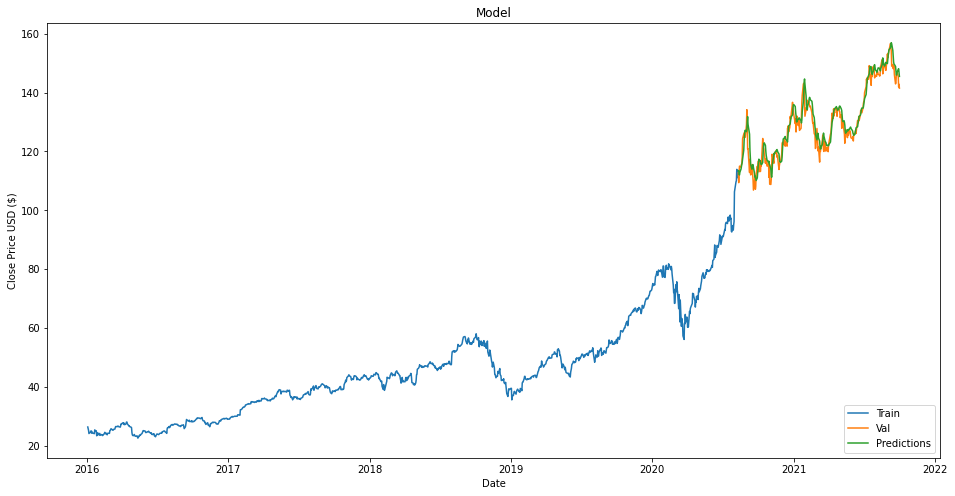

In [23]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()